In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')



# Add 'overweight' column
# Calculating BMI
BMI = df['weight'] / ((df['height']/100)**2)
mask_BMI = BMI > 25 
# Configuring overweight column
df['overweight'] = mask_BMI
df['overweight'] = df['overweight'].replace({True: 1, False: 0})



# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
# Masks
mask_cholesterol = df['cholesterol'] > 1
mask_gluc = df['gluc'] > 1
# Normalizing columns
df['cholesterol'] = mask_cholesterol
df['cholesterol'] = df['cholesterol'].replace({True: 1, False: 0})
df['gluc'] = mask_gluc
df['gluc'] = df['gluc'].replace({True: 1, False: 0})



# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df.drop(["id", "age", "sex", "height", "weight", "ap_hi", "ap_lo"], axis = 1)
    df_cat = pd.melt(df_cat)

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df.drop(["id", "age", "sex", "height", "weight", "ap_hi", "ap_lo"], axis = 1)
    df_cat = pd.melt(df_cat,'cardio')
    df_cat = pd.DataFrame(df_cat.value_counts()).reset_index()
    df_cat.columns = ['cardio', 'variable', 'value', 'total']
    df_cat = df_cat.sort_values('variable', ascending=True)
   

    
    # Draw the catplot with 'sns.catplot()'
    # Commented out to prevent two images appearing
    # sns.catplot(x = 'variable', y = 'total', hue = 'value', col = "cardio", col_wrap = 2, data = df_cat, kind = "bar")



    # Get the figure for the output
    fig = sns.catplot(x = 'variable', y = 'total', hue = 'value', col = "cardio", col_wrap = 2, data = df_cat, kind = "bar")



    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig




# Draw Heat Map
def draw_heat_map():
    # Cleaning Data
    # Masks
    mask_clean = (df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))
    # Dataframes
    df_heat = df[mask_clean]



    # Calculate the correlation matrix
    corr = df_heat.corr().round(1)



    # Generate a mask for the upper triangle
    # Dropping duplicate values, used np.tril so heatmap looks like example 2
    np.tril(np.ones(corr.shape)).astype(bool)
    mask = corr.where(np.tril(np.ones(corr.shape)).astype(bool))
    # reomoving the 1.0 values
    mask_1 = mask == 1
    mask = mask[mask_1 == False]



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize = (15,7))
    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(mask, annot = True, fmt = ".1f", center = 0.08)



    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

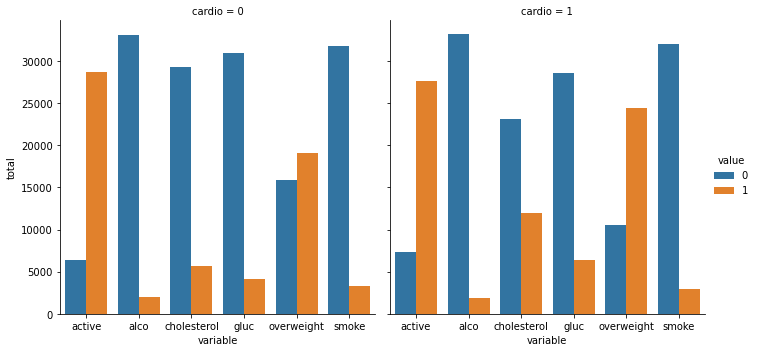

In [60]:
draw_cat_plot()

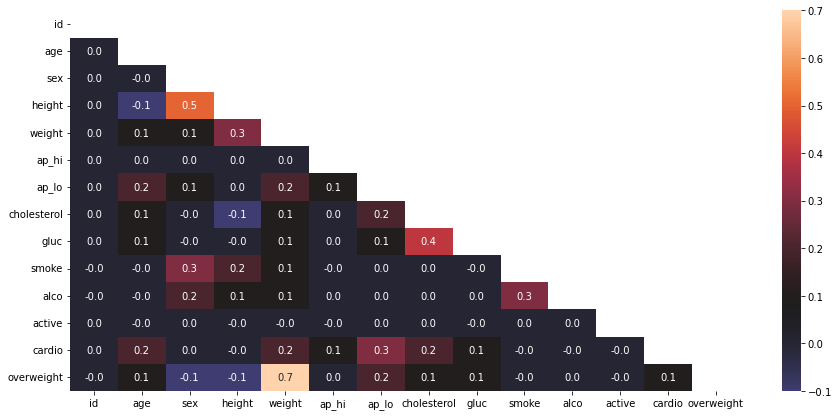

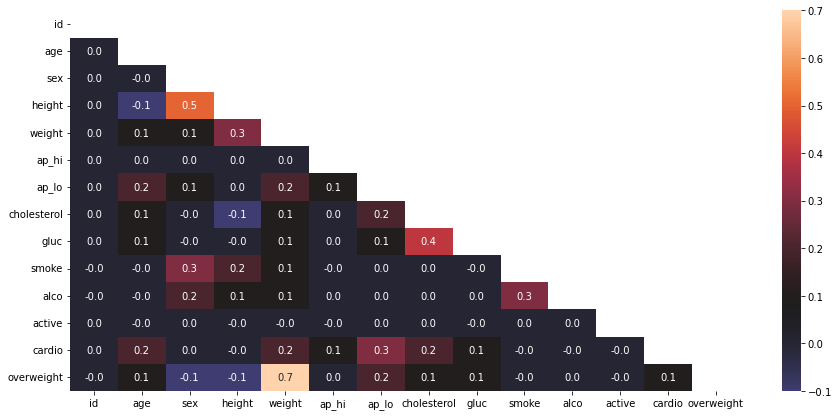

In [61]:
draw_heat_map()